<a href="https://colab.research.google.com/github/madjidsadou/2024_Intro_Python/blob/main/Copy_of_W4_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Exercises) Multivariate linear regression and clustering

What if our dataset has multiple dimensions and we want to find equations that looks something like this?
$$
y = w_1 x_1 + w_2 x_2 + w_3 x_3 + ... + b
$$

Here we show how we would do it with scikit-learn to find a linear equation that describes the Kaggle [Advertising dataset](https://www.kaggle.com/datasets/bumba5341/advertisingcsv?resource=download)

## Exercise 1: Multivariate linear regression

### Q1: Use pandas to import the advertising dataset

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pooch
import urllib.request
import pandas as pd

In [37]:
myadvertising = pooch.retrieve('https://unils-my.sharepoint.com/:x:/g/personal/tom_beucler_unil_ch/EeqnI6nF9iBAkUOACbZ3mWUBDZ8N5mVP1oOaFd4vy6tIzw?download=1',
                          known_hash='69104adc017e75d7019f61fe66ca2eb4ab014ee6f2a9b39b452943f209352010')

In [38]:
# Q1a: Use pandas to import the dataset
data_set= pd.read_csv(myadvertising)

In [39]:
# Q1b: Display the first rows of the data with pandas
data_set.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [40]:
#@title Code skeleton
# Q1a: Use pandas to import the dataset
__ = pd.__(_,_)
# Q1b: Display the first rows of the data with pandas
__.__()

AttributeError: module 'pandas' has no attribute '__'

### Q2: Try to use scikit-learn linear regression model to predict "Sales" from three columns "TV", "Radio", "Newspaper"

This model will basically tell us how sales would change if we put resources to advertise products in three different medias. The [Linear Regression documentation is at this link](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html).

In [41]:
# Import the linear regression model you wish to use
from sklearn.linear_model import LinearRegression

In [42]:
# Construct Input / Output matrices
# and instantiate / train a linear regression model
Xall = data_set[['TV','Radio',"Newspaper"]].values
y = data_set['Sales'].values
linreg = LinearRegression()
linreg.fit(Xall,y)

LinearRegression()

In [ ]:
#@title Code skeleton
from sklearn.____ import ____

# Construct Input / Output matrices
Xall = __[[_,_,_]].values
y = _[].values
linreg = ___
linreg.__(_,_)

### Q3: Print out the linear equation coefficients and intercept

Hints:

(1) When you print the coefficients and intercepts, try to retain only the first two digits. One way to do it is through the `.round()` function in `numpy`

(2) Check out the scikit-learn `linear-model` module for instructions on extracting the coefficients and intercepts of the trained model.


In [43]:
# Print your coefficients and intercept here.
print(f'Coefficients {linreg.coef_[0]}, Intercept: {linreg.intercept_}')


Coefficients 0.0457646454553976, Intercept: 2.938889369459412


## Exercise 2: Clustering Penguin Dataset

In the exercise, we will try to repeat the k-mean clustering procedure introuduced in the tutorial, but on a different 2D variable plane.

Let's try "culmen_length_mm" and "Flipper_length_mm"?

Can we differentiate penguins from the length of the beak and their wings?

<img style="padding: 10px; float:left;" alt="20 points and their Voronoi cells by Balu Ertl CC BY-SA 4.0" src="https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png" width="400">

In [44]:
penguinsize = pooch.retrieve('https://unils-my.sharepoint.com/:x:/g/personal/tom_beucler_unil_ch/ETfy8shC_PtBnsYren_f60UBSyn6Zz1CVvE0Z6_z575VZA?download=1',
                          known_hash='aa728597b2228a2637e39c6f08e40a80971f4cdac7faf7bc21ff4481ee3e3ae9')

penguins = pd.read_csv(penguinsize)
print(penguins.head())

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


### Q1: Data clean up. Remove all rows in the table if the rows contain missing values

Hint: `pandas` has a easy function for data clean up. Check out [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) for details.

In [47]:
# Clean up the data here
penguins.dropna(inplace=True)
print(penguins.head())

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
4       3450.0  FEMALE  
5       3650.0    MALE  


In [ ]:
#@title Code skeleton
penguin_df = penguins.___________

### Q2: Create an input dataset `X` with the culmen_length_mm and flipper_length_mm data columns

Hints:

(1) The shape of your input data should be `(334, 2)`

In [55]:
# Create your input for model training here
# Input should contain penguin_df['culmen_length_mm'] and penguin_df['flipper_length_mm']
X = penguins[['culmen_length_mm', 'flipper_length_mm']]
print(X.shape)

(334, 2)


### Q3: Train a K-means clustering algorithm, and perform an elbow test followed by silhouette analysis

Hints:

(1) The documentation for KMeans clustering can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans)

(2) [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html?highlight=silhouette+score#sklearn.metrics.silhouette_score) for silhouette score analysis in scikit-learn

In [56]:
# Import the KMeans class and
# the Silhouette score function from scikit-learn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
#@title Skeleton code
# Import KMeans fron scikit-learn
from sklearn.________ import ______
# Import Silhouette score fron scikit-learn
from sklearn._______ import ________________

In [ ]:
# Store the K-means inertia in an empty list


In [89]:
# Store the K-means inertia in an empty list
inertia_list = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X)
 inertia_list.append(kmeans.inertia_)

In [ ]:
# To finish the elbow method analysis,
# plot the change in inertia when you change the number of clusters
# you used to train the k-means clustering algorithm.

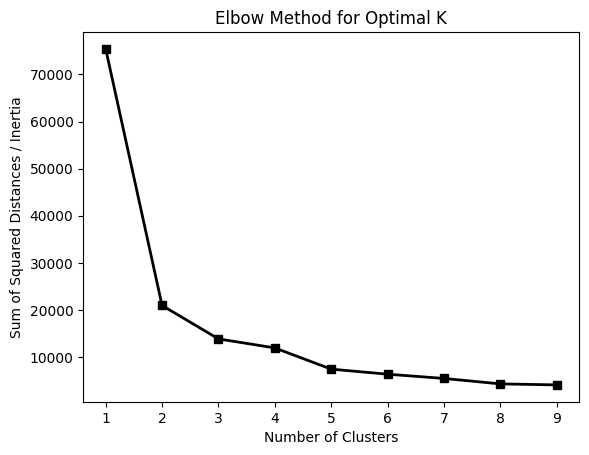

In [90]:
#@title Skeleton code
# To finish the elbow method analysis, plot the change in inertia when you change the number of clusters you used to train the k-means clustering algorithm.
plt.plot(K,inertia_list,marker='s',c='k',lw=2)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances / Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

This is what your TA got after filling in and running the skeleton code.

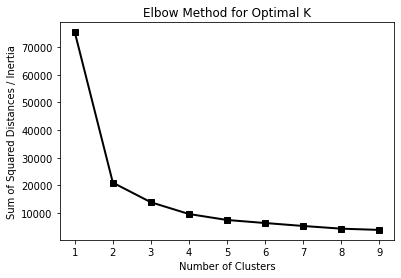

In [ ]:
# Perform silhouette analysis following instructions in the tutorial notebook


In [98]:
#@title Skeleton code
silhouette_list = []
for num_clusters in range(2,11):
  # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(X)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_list.append(silhouette_score(X, cluster_labels))


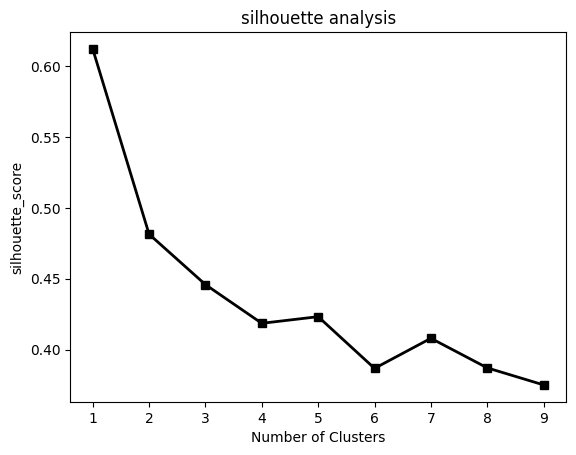

In [99]:
plt.plot(K,silhouette_list,marker='s',c='k',lw=2)
plt.xlabel('Number of Clusters')
plt.ylabel('silhouette_score')
plt.title('silhouette analysis')
plt.show()

Here is a screenshot of how the results should look like.

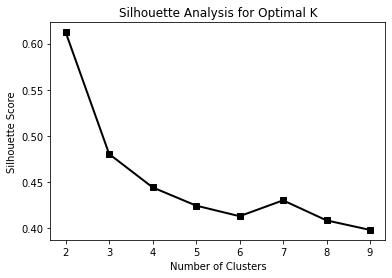

Based on the silhouette and elbow analysis, it seems the either 2 or 3 clusters is suitable for this penguin dataset.

### Q4: Perform KMeans clustering with 3 clusters

In [106]:
# Train a k-means clustering model with 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [ ]:
# Use the model to label all data points


In [ ]:
#@title Skeleton code
# Train a k-means clustering model
kmeans = _______(n_clusters=3)
kmeans._____(_)

# Use the model to label all data points
_______ = kmeans._______(_)

Now, our penguin dataset is labelled. So we can compare our clustering results with the truth to see how well our trained model performed.

**First** store the predicted labels in the pandas dataframe

In [ ]:
# Store the predicted labels in a new index


In [114]:
#@title Skeleton code
penguins['cluster_labels'] = kmeans.predict(X)
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cluster_labels
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,2
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,0


# **Then extract the culmen_length_mm and flipper_length_mm of the three penguin categories as truth**

In [115]:
truth_data = penguins.groupby('species')[['culmen_length_mm', 'flipper_length_mm']]

# Iterate over each species and display the data
for species, data in truth_data:
    print(f"Species: {species}")
    print(data.head())  # Display the first few rows for each species
    print("\n")


Species: Adelie
   culmen_length_mm  flipper_length_mm
0              39.1              181.0
1              39.5              186.0
2              40.3              195.0
4              36.7              193.0
5              39.3              190.0


Species: Chinstrap
     culmen_length_mm  flipper_length_mm
152              46.5              192.0
153              50.0              196.0
154              51.3              193.0
155              45.4              188.0
156              52.7              197.0


Species: Gentoo
     culmen_length_mm  flipper_length_mm
220              46.1              211.0
221              50.0              230.0
222              48.7              210.0
223              50.0              218.0
224              47.6              215.0




Recreate the figure below

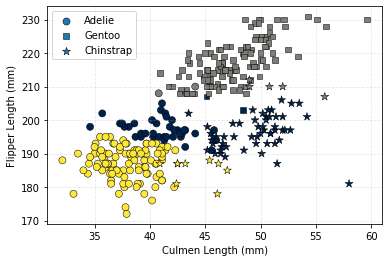

In [ ]:
# Script to recreate the figure


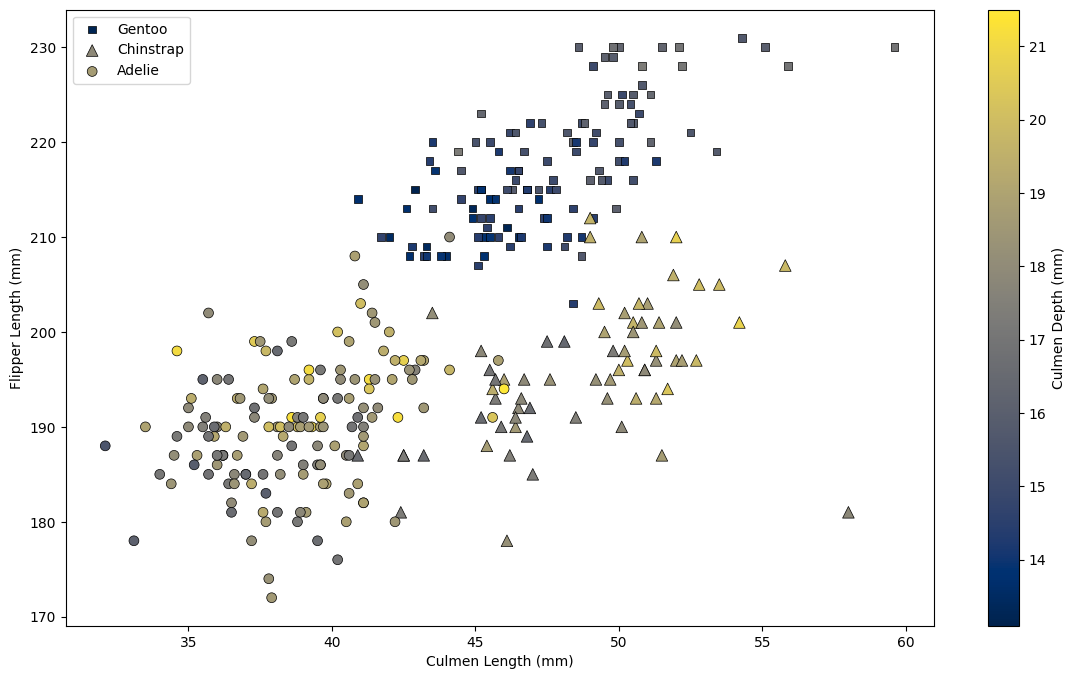

In [125]:

# Filter the DataFrame for 'Gentoo' and 'Chinstrap' species
gentoo_penguins = penguins[penguins['species'] == 'Gentoo']
chinstrap_penguins = penguins[penguins['species'] == 'Chinstrap']
adelie_penguins = penguins[penguins['species'] == 'Adelie']
fig,ax = plt.subplots(figsize=(14,8))


plt.scatter(gentoo_penguins['culmen_length_mm'], gentoo_penguins['flipper_length_mm'],
            c=gentoo_penguins['culmen_depth_mm'], s=30, marker='s', label='Gentoo',
            cmap='cividis', edgecolors='k', linewidths=0.5,
            vmin=penguins['culmen_depth_mm'].min(), vmax=penguins['culmen_depth_mm'].max())

plt.scatter(chinstrap_penguins['culmen_length_mm'], chinstrap_penguins['flipper_length_mm'],
            c=chinstrap_penguins['culmen_depth_mm'], s=70, marker='^', label='Chinstrap',
            cmap='cividis', edgecolors='k', linewidths=0.5,
            vmin=penguins['culmen_depth_mm'].min(), vmax=penguins['culmen_depth_mm'].max())

plt.scatter(adelie_penguins['culmen_length_mm'], adelie_penguins['flipper_length_mm'],
            c=adelie_penguins['culmen_depth_mm'], s=50, marker='o', label='Adelie',
            cmap='cividis', edgecolors='k', linewidths=0.5,
            vmin=penguins['culmen_depth_mm'].min(), vmax=penguins['culmen_depth_mm'].max())

plt.colorbar(label='Culmen Depth (mm)') # Add a colorbar with label
plt.ylabel('Flipper Length (mm)')  # Set y-axis label
plt.xlabel('Culmen Length (mm)')  # Set x-axis label
plt.legend() # Display the legend
plt.show()


### Q5: Train the KMeans clustering with 2 clusters

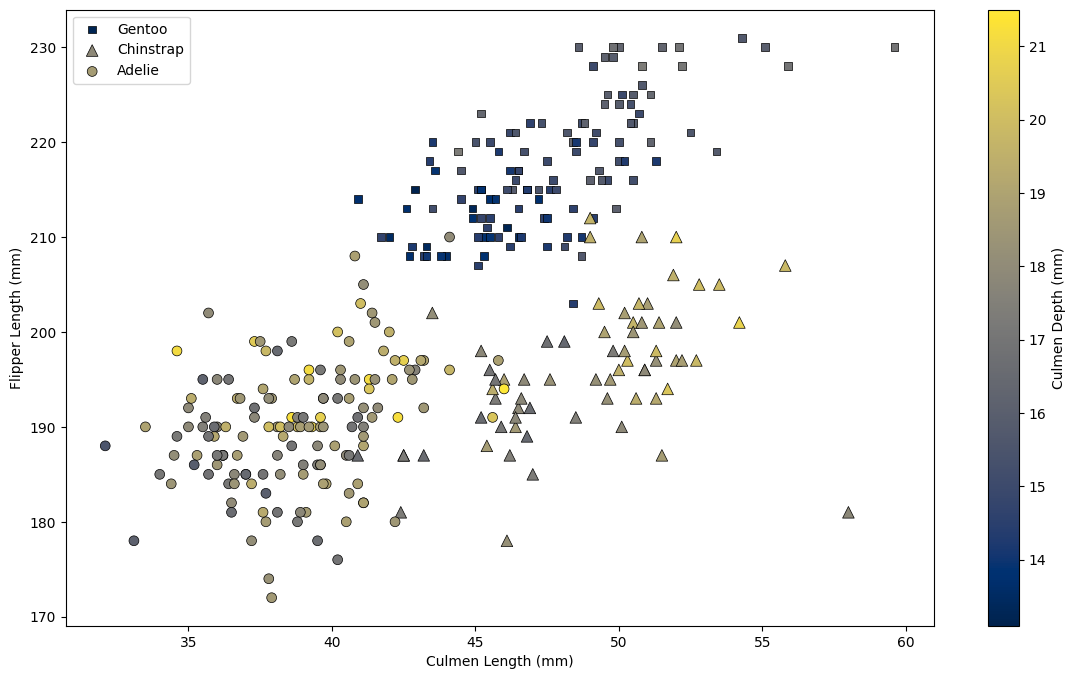

In [124]:
# Train k-means clustering algorithm here
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
# Predict labels
penguins['cluster_labels'] = kmeans.predict(X)
penguins.head()
# Filter the DataFrame for 'Gentoo' and 'Chinstrap' species
gentoo_penguins = penguins[penguins['species'] == 'Gentoo']
chinstrap_penguins = penguins[penguins['species'] == 'Chinstrap']
adelie_penguins = penguins[penguins['species'] == 'Adelie']

fig,ax = plt.subplots(figsize=(14,8))
plt.scatter(gentoo_penguins['culmen_length_mm'], gentoo_penguins['flipper_length_mm'],
            c=gentoo_penguins['culmen_depth_mm'], s=30, marker='s', label='Gentoo',
            cmap='cividis', edgecolors='k', linewidths=0.5,
            vmin=penguins['culmen_depth_mm'].min(), vmax=penguins['culmen_depth_mm'].max())

plt.scatter(chinstrap_penguins['culmen_length_mm'], chinstrap_penguins['flipper_length_mm'],
            c=chinstrap_penguins['culmen_depth_mm'], s=70, marker='^', label='Chinstrap',
            cmap='cividis', edgecolors='k', linewidths=0.5,
            vmin=penguins['culmen_depth_mm'].min(), vmax=penguins['culmen_depth_mm'].max())

plt.scatter(adelie_penguins['culmen_length_mm'], adelie_penguins['flipper_length_mm'],
            c=adelie_penguins['culmen_depth_mm'], s=50, marker='o', label='Adelie',
            cmap='cividis', edgecolors='k', linewidths=0.5,
            vmin=penguins['culmen_depth_mm'].min(), vmax=penguins['culmen_depth_mm'].max())

plt.colorbar(label='Culmen Depth (mm)') # Add a colorbar with label
plt.ylabel('Flipper Length (mm)')  # Set y-axis label
plt.xlabel('Culmen Length (mm)')  # Set x-axis label
plt.legend() # Display the legend
plt.show()


We got this figure with our model. Can you recreate it?

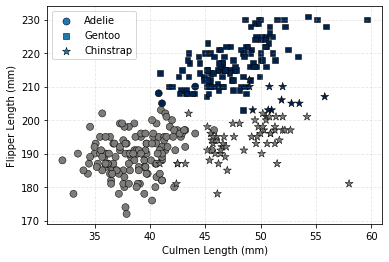